In [1]:
# Standard library
import os
import sys
import warnings

# Scientific computing
import numpy as np
import pandas as pd
import math
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

# Single-cell & image analysis
import anndata as ad
import scanpy as sc
import scimap as sm

# Interactive viewer
import napari
import pandas as pd
import os
import anndata as ad
# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

Running SCIMAP  2.3.5


c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



## Importing data

In [3]:
normalized_area_filtered = ad.read_h5ad('G://farkkilab2//7_TLS//Data//Exp_4//qc//results//selectROIs_UNIFORM.h5ad')
adata = ad.read_h5ad('G://farkkilab2//7_TLS//Data//Exp_4//qc//results//selectROIs_all_raw.h5ad') ##Parquet files aggregation_

## Integrate the normalized data into the selectROIs results
normresult_df = pd.DataFrame(normalized_area_filtered.X, index=normalized_area_filtered.obs.index, columns= [
    'DAPI1_normalized', 'BCL6_normalized', 'IgG_normalized',
    'AICDA_normalized', 'CD138_normalized', 'DAPI2_normalized',
    'Tcf1_normalized', 'FOXP3_normalized', 'PD1_normalized',
    'CD45_normalized', 'DAPI3_normalized', 'CD21_normalized',
    'Ki-67_normalized', 'CD20_normalized', 'Vimentin_normalized',
    'DAPI4_normalized', 'CD4_normalized', 'CD11c_normalized',
    'CD8a_normalized', 'DAPI5_normalized', 'HEV_normalized',
    'PanCK_normalized', 'CD31_normalized', 'DAPI6_normalized',
    'Iba1_normalized', 'CD3D_normalized', 'IgD_normalized',
    'DAPI7_normalized', 'aSMA_normalized', 'HLA-DPB2_normalized',
    'HLA-A_normalized'
])
normresult_df = normresult_df.join(normalized_area_filtered.obs)
normresult_df["imageid"]=normresult_df["sample_id"]
result_df = pd.DataFrame(adata.X, index=adata.obs.index, columns=adata.var.index)
result_df = result_df.join(adata.obs)
merged_df = pd.merge(
    normresult_df,
    result_df,
    on=['imageid', 'CellID'],
    how='inner'  # or 'outer', 'left', 'right' depending on your need
)
result_df = merged_df

In [ ]:
path_to_h5ad_file = 
adata = ad.read_h5ad(path_to_h5ad_file) ##Parquet files aggregation_
result_df = pd.DataFrame(adata.X, index=adata.obs.index, columns=adata.var.index)
result_df = result_df.join(adata.obs)

## Explore thresholds and metrics

In [17]:
def plot_dapi_histograms(
    df,
    y_mode='ratio',  # Options: 'ratio', 'DAPI2', 'DAPI8', or any other numeric column name
    dapi2_col='DAPI2_normalized',
    dapi8_col='DAPI7_normalized',
    log_transform_input=False,
    bins=100,
    sample_col='Sample',
    specific_sample=None,
    custom_title=None
):
    sns.set_style('whitegrid')

    # Determine samples to plot
    if specific_sample is not None:
        samples = [specific_sample]
    else:
        samples = df[sample_col].dropna().unique()
    n_samples = len(samples)

    # Grid layout
    n_cols = math.ceil(math.sqrt(n_samples))
    n_rows = math.ceil(n_samples / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharey=True)
    axes = axes.flatten() if n_samples > 1 else [axes]

    for idx, sample in enumerate(samples):
        ax = axes[idx]
        sub_df = df[df[sample_col] == sample].copy()

        # Determine what to plot
        if y_mode == 'ratio':
            sub_df['ratio'] = sub_df[dapi2_col] / sub_df[dapi8_col]
            sub_df['log10_ratio'] = sub_df['ratio']
            data_to_plot = sub_df['log10_ratio'].dropna()
            xlabel = f"{dapi2_col} / {dapi8_col}"

        elif y_mode in sub_df.columns:
            data_to_plot = sub_df[y_mode].replace(0, np.nan)
            if log_transform_input:
                data_to_plot = np.log10(data_to_plot)
                xlabel = f"({y_mode})"
            else:
                xlabel = y_mode
            data_to_plot = data_to_plot.dropna()

        else:
            raise ValueError(f"'{y_mode}' is not 'ratio' or a valid column name in the DataFrame.")

        # Plot histogram
        ax.hist(
            data_to_plot,
            bins=bins,
            color='grey',
            edgecolor='none',
            alpha=0.75,
            histtype='stepfilled'
        )

        ax.set_title(f'Sample: {sample}', fontsize=10)
        ax.set_xlabel(xlabel, fontsize=9)
        ax.set_ylabel('Cell Count', fontsize=9)
        ax.tick_params(axis='both', labelsize=8)

    # Hide unused axes
    for j in range(n_samples, len(axes)):
        fig.delaxes(axes[j])

    # Set title
    if custom_title:
        title = custom_title
    elif y_mode == 'ratio':
        title = f"{dapi2_col}/{dapi8_col}) per Sample"
    else:
        title = f"{xlabel} Distribution per Sample"

    fig.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


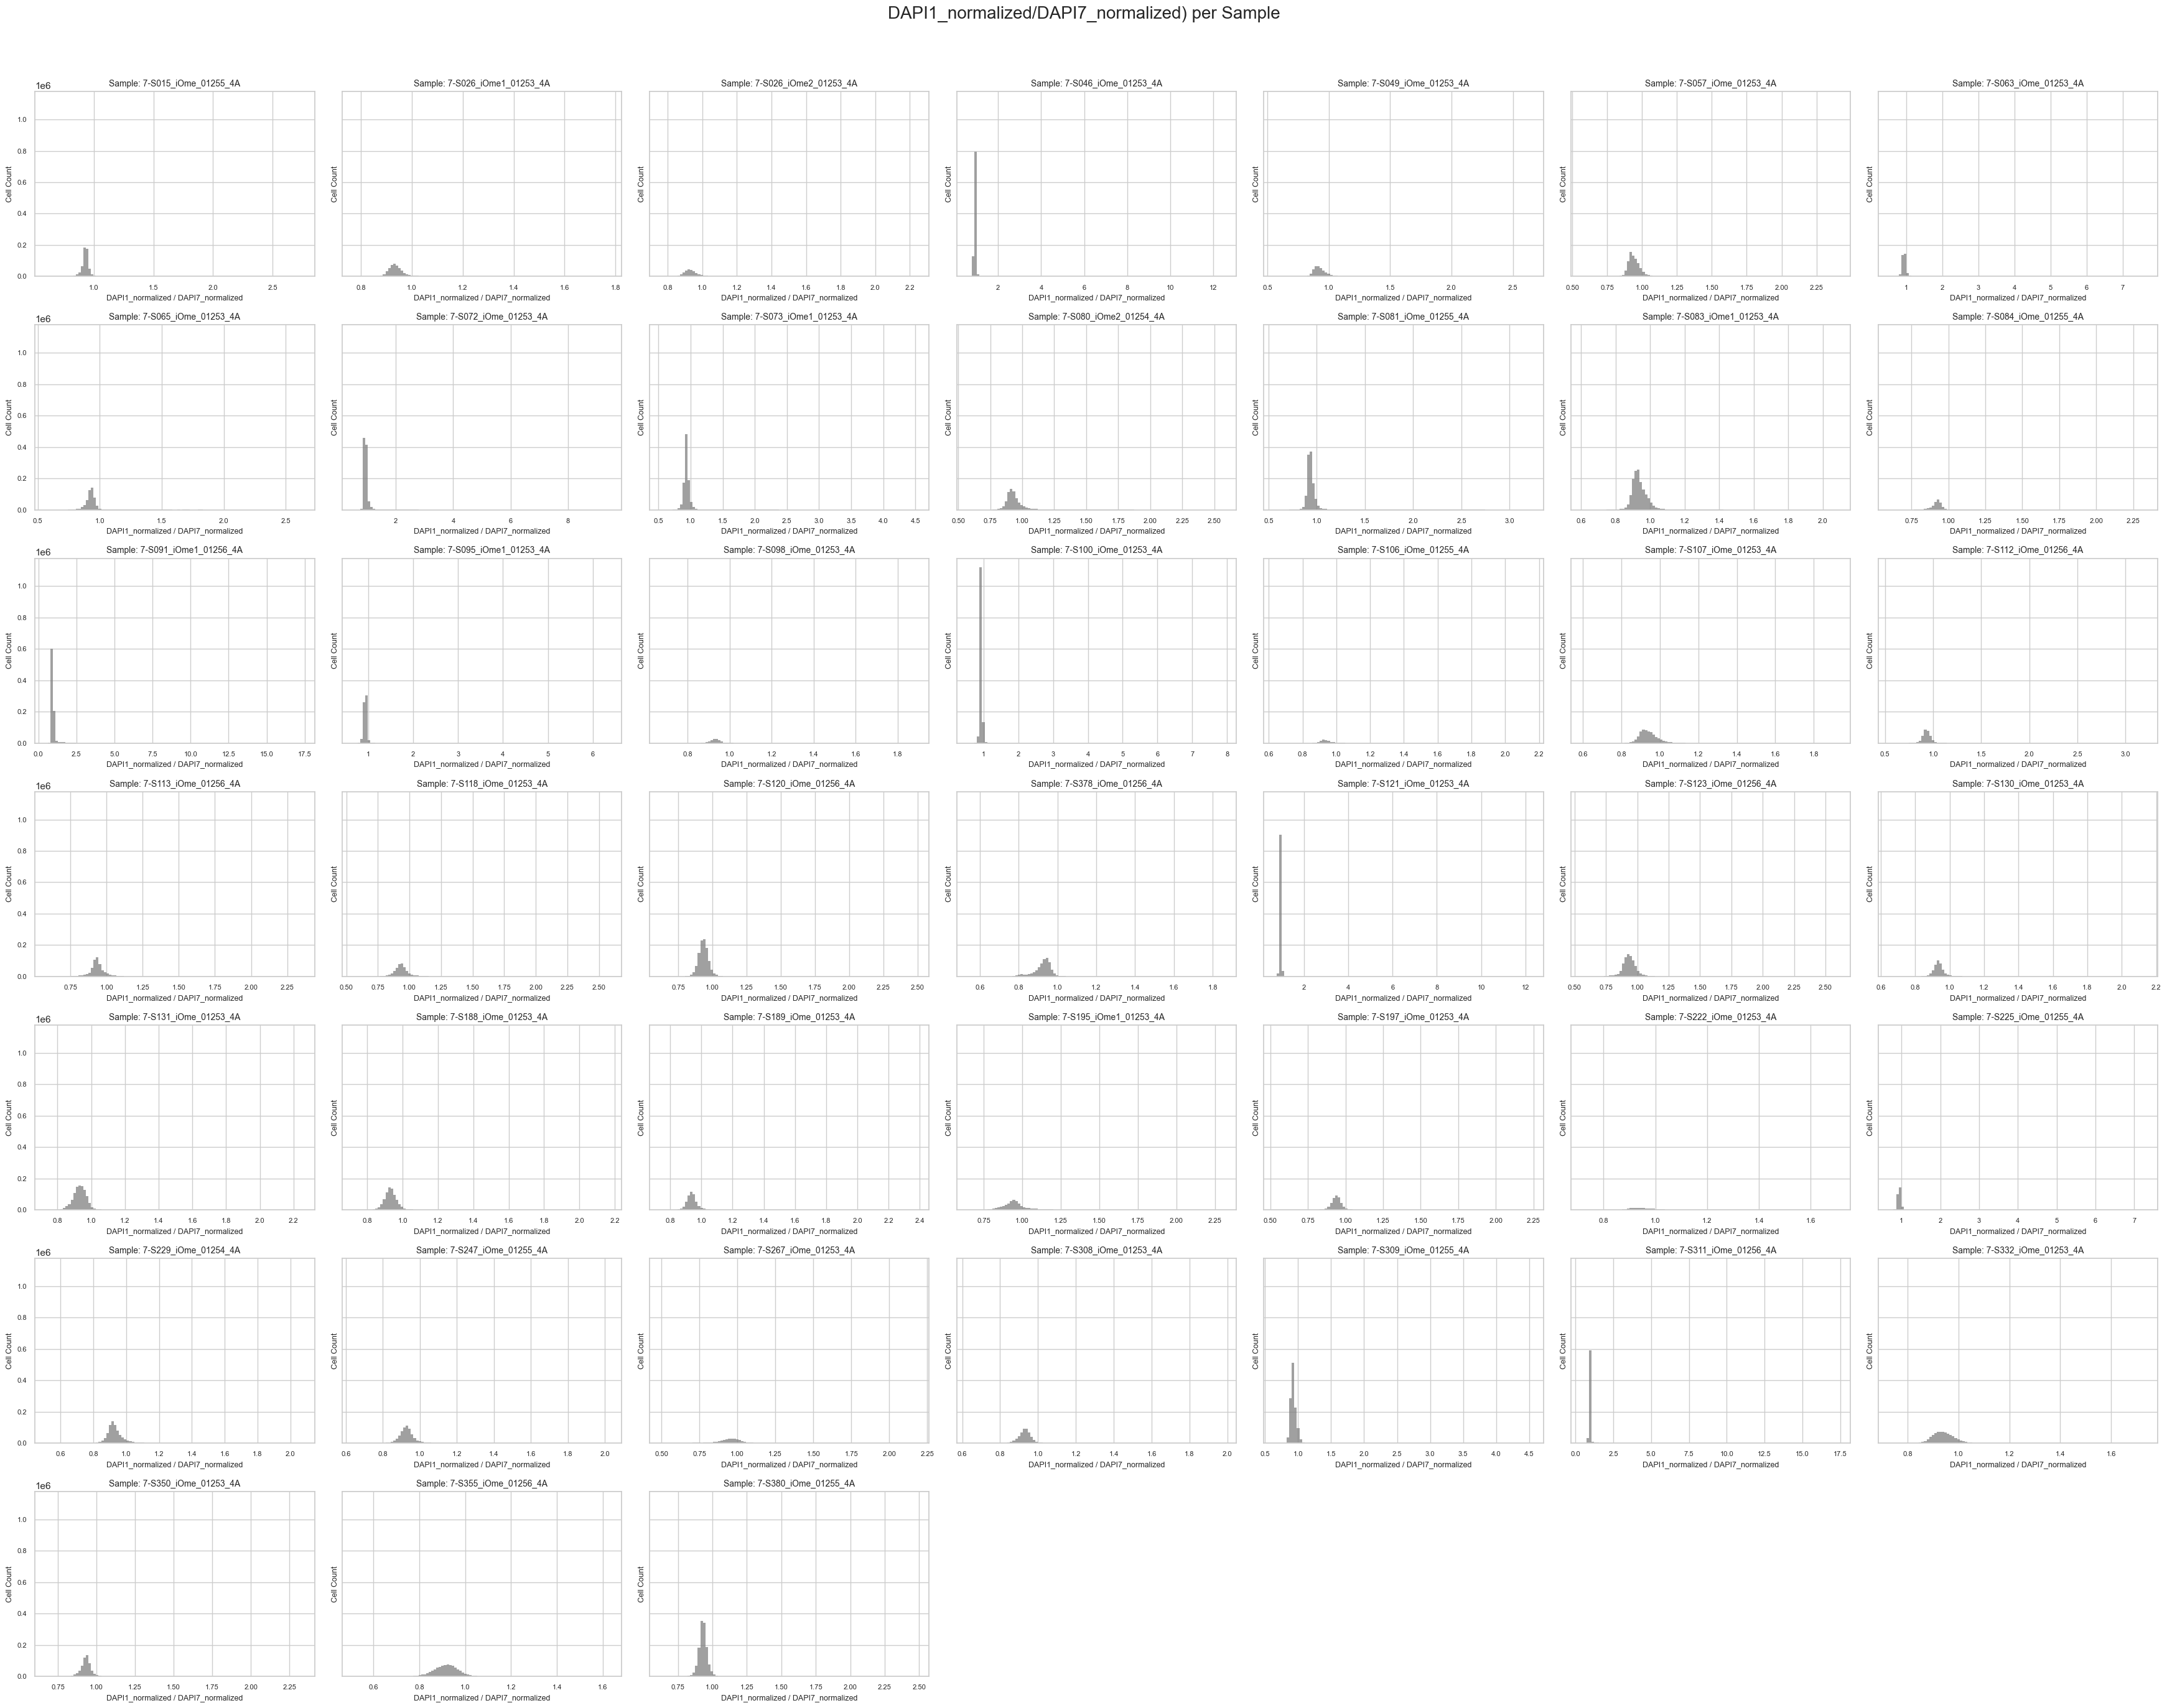

In [18]:
plot_dapi_histograms(result_df, y_mode='ratio', dapi2_col='DAPI1_normalized', dapi8_col='DAPI7_normalized',log_transform_input=False)

## Visualize the gates over the image

In [12]:
# 1 Computing new metrics in result_df (if any)
result_df['ratio_unsc'] =  result_df["DAPI1_normalized"]/result_df["DAPI7_normalized"]


In [ ]:
# 2 Adding markers + variables to threshold
variables_to_qc = []
marker_list = []
       
# Append the elements of variables_to_qc to marker_list
marker_list += variables_to_qc  # This adds all the elements from variables_to_qc to marker_list

directory_img = 
directory_seg = 

# Create adata object
data = result_df[marker_list]
meta = result_df.drop(columns=marker_list)
adata = ad.AnnData (data)
adata.obs = meta

In [ ]:
# 3. Subset data to specific image
subset_adata = adata[adata.obs['imageid']=="S195"]
sample_name = subset_adata.obs['Sample'].values[1]
# sample_name = "7-S026_iOme2_01253_4A"
subset_adata = adata[adata.obs['Sample']==sample_name]
area_index = list(subset_adata.var_names).index('Area')
subset_adata = subset_adata[subset_adata.X[:, area_index] > 30].copy()
subset_adata.obs['Sample'].value_counts()

In [32]:
# 4. Visualize the image and gate
marker_list = ['DAPI1', 'BCL6', 'IgG', 'AICDA', 'CD138', 'DAPI2', 'Tcf1',
       'FOXP3', 'PD1', 'CD45', 'DAPI3', 'CD21', 'Ki-67', 'CD20', 'Vimentin',
       'DAPI4', 'CD4', 'CD11c', 'CD8a', 'DAPI5', 'HEV', 'PanCK', 'CD31',
       'DAPI6', 'Iba1', 'CD3D', 'IgD', 'DAPI7', 'aSMA', 'HLA-DPB2', 'HLA-A','DAPI8', 'CD68', 'PAX8', 'NKG2A', 'DAPI9', 'CD163', 'FAP', 'PAX8_2']#,

file_image_dir = directory_img +sample_name+".ome.tif"
mask_file = directory_seg +sample_name+".ome.tif"
marker_of_interest = 'ratio_unsc'
sm.pl.gate_finder (file_image_dir, subset_adata,marker_of_interest,log= False, 
                   from_gate =1.1, to_gate = 1.2, increment = 0.01, channel_names = marker_list,x_coordinate="X_centroid",y_coordinate="Y_centroid",
                   markers=['DAPI1','DAPI7','DAPI9','CD20'],point_size=7)

## Visualize the impact of the QC

In [23]:
def filter_cells_step_by_step(result_df, thresholds):
    results = []

    for sample_id in result_df['imageid'].unique():
        sample_df = result_df[result_df['imageid'] == sample_id]
        initial_count = len(sample_df)

        # Add Start Step
        results.append({
            'sample': sample_id,
            'step': 'Start',
            'threshold': None,
            'cutoff_type': None,
            'initial_cell_count': initial_count,
            'cell_count_at_step_start': initial_count,
            'cell_dropout_in_step': 0,
            'percentage_cell_dropout_in_step': 0.0,
            'cumulative_cell_dropout': 0,
            'percentage_cumulative_cell_dropout': 0.0,
            'cells_preserved_in_step': initial_count,
            'percentage_cells_preserved_in_step': 100.0,
            'cumulative_cells_preserved': initial_count,
            'percentage_cumulative_cells_preserved': 100.0
        })

        remaining_cells = initial_count
        cumulative_dropped = 0
        cumulative_preserved = initial_count

        for step in thresholds:
            column = step['column']
            cutoff_type = step['cutoff_type']
            threshold_value = step['value']
            title = step.get('title', f"{column}_{cutoff_type}")

            before_filtering = len(sample_df)

            # Apply filtering
            if cutoff_type == 'lower':
                sample_df = sample_df[sample_df[column] >= threshold_value]
            elif cutoff_type == 'upper':
                sample_df = sample_df[sample_df[column] <= threshold_value]
            else:
                raise ValueError(f"Unknown cutoff type '{cutoff_type}' for column '{column}'")

            after_filtering = len(sample_df)
            dropped_in_step = before_filtering - after_filtering
            dropped_percentage = (dropped_in_step / initial_count) * 100
            preserved_percentage = 100 - dropped_percentage

            remaining_cells = after_filtering
            cumulative_dropped += dropped_in_step
            cumulative_dropped_percentage = (cumulative_dropped / initial_count) * 100
            cumulative_preserved = remaining_cells
            cumulative_preserved_percentage = (cumulative_preserved / initial_count) * 100

            results.append({
                'sample': sample_id,
                'step': title,
                'threshold': threshold_value,
                'cutoff_type': cutoff_type,
                'initial_cell_count': initial_count,
                'cell_count_at_step_start': before_filtering,
                'cell_dropout_in_step': dropped_in_step,
                'percentage_cell_dropout_in_step': dropped_percentage,
                'cumulative_cell_dropout': cumulative_dropped,
                'percentage_cumulative_cell_dropout': cumulative_dropped_percentage,
                'cells_preserved_in_step': remaining_cells,
                'percentage_cells_preserved_in_step': preserved_percentage,
                'cumulative_cells_preserved': cumulative_preserved,
                'percentage_cumulative_cells_preserved': cumulative_preserved_percentage
            })

    return pd.DataFrame(results)
# Define filtering steps sequentially.
# Each step is a dictionary with:
#   - 'column'      : the marker name (e.g. 'Area', 'ratio_unsc')
#   - 'cutoff_type' : 'lower' (keep ≥ value) or 'upper' (keep ≤ value)
#   - 'value'       : numeric threshold
#   - 'title'       : (optional) custom step name to appear in the output

In [33]:
thresholds = [
    {'column': 'Area', 'cutoff_type': 'lower', 'value': 30, 'title': 'Area'},
    {'column': 'ratio_unsc', 'cutoff_type': 'lower', 'value': 0.8, 'title': 'Min DAPI1/7'},
    {'column': 'ratio_unsc', 'cutoff_type': 'upper', 'value': 1.15, 'title': 'Max DAPI1/7'}
]
# Apply the function to filter cells step-by-step
sample_qc = filter_cells_step_by_step(result_df, thresholds)
# Display the results
sample_qc.head(5)  # Display the first 20 rows to verify the "Start" step

,sample,step,threshold,cutoff_type,initial_cell_count,cell_count_at_step_start,cell_dropout_in_step,percentage_cell_dropout_in_step,cumulative_cell_dropout,percentage_cumulative_cell_dropout,cells_preserved_in_step,percentage_cells_preserved_in_step,cumulative_cells_preserved,percentage_cumulative_cells_preserved
0,S091,Start,NaN,None,848728,848728,0,0.000000,0,0.000000,848728,100.000000,848728,100.000000
1,S091,Area,30.00,lower,848728,848728,39425,4.645187,39425,4.645187,809303,95.354813,809303,95.354813
2,S091,Min DAPI1/7,0.80,lower,848728,809303,816,0.096144,40241,4.741331,808487,99.903856,808487,95.258669
3,S091,Max DAPI1/7,1.15,upper,848728,808487,38219,4.503092,78460,9.244422,770268,95.496908,770268,90.755578
4,S100,Start,NaN,None,1306300,1306300,0,0.000000,0,0.000000,1306300,100.000000,1306300,100.000000


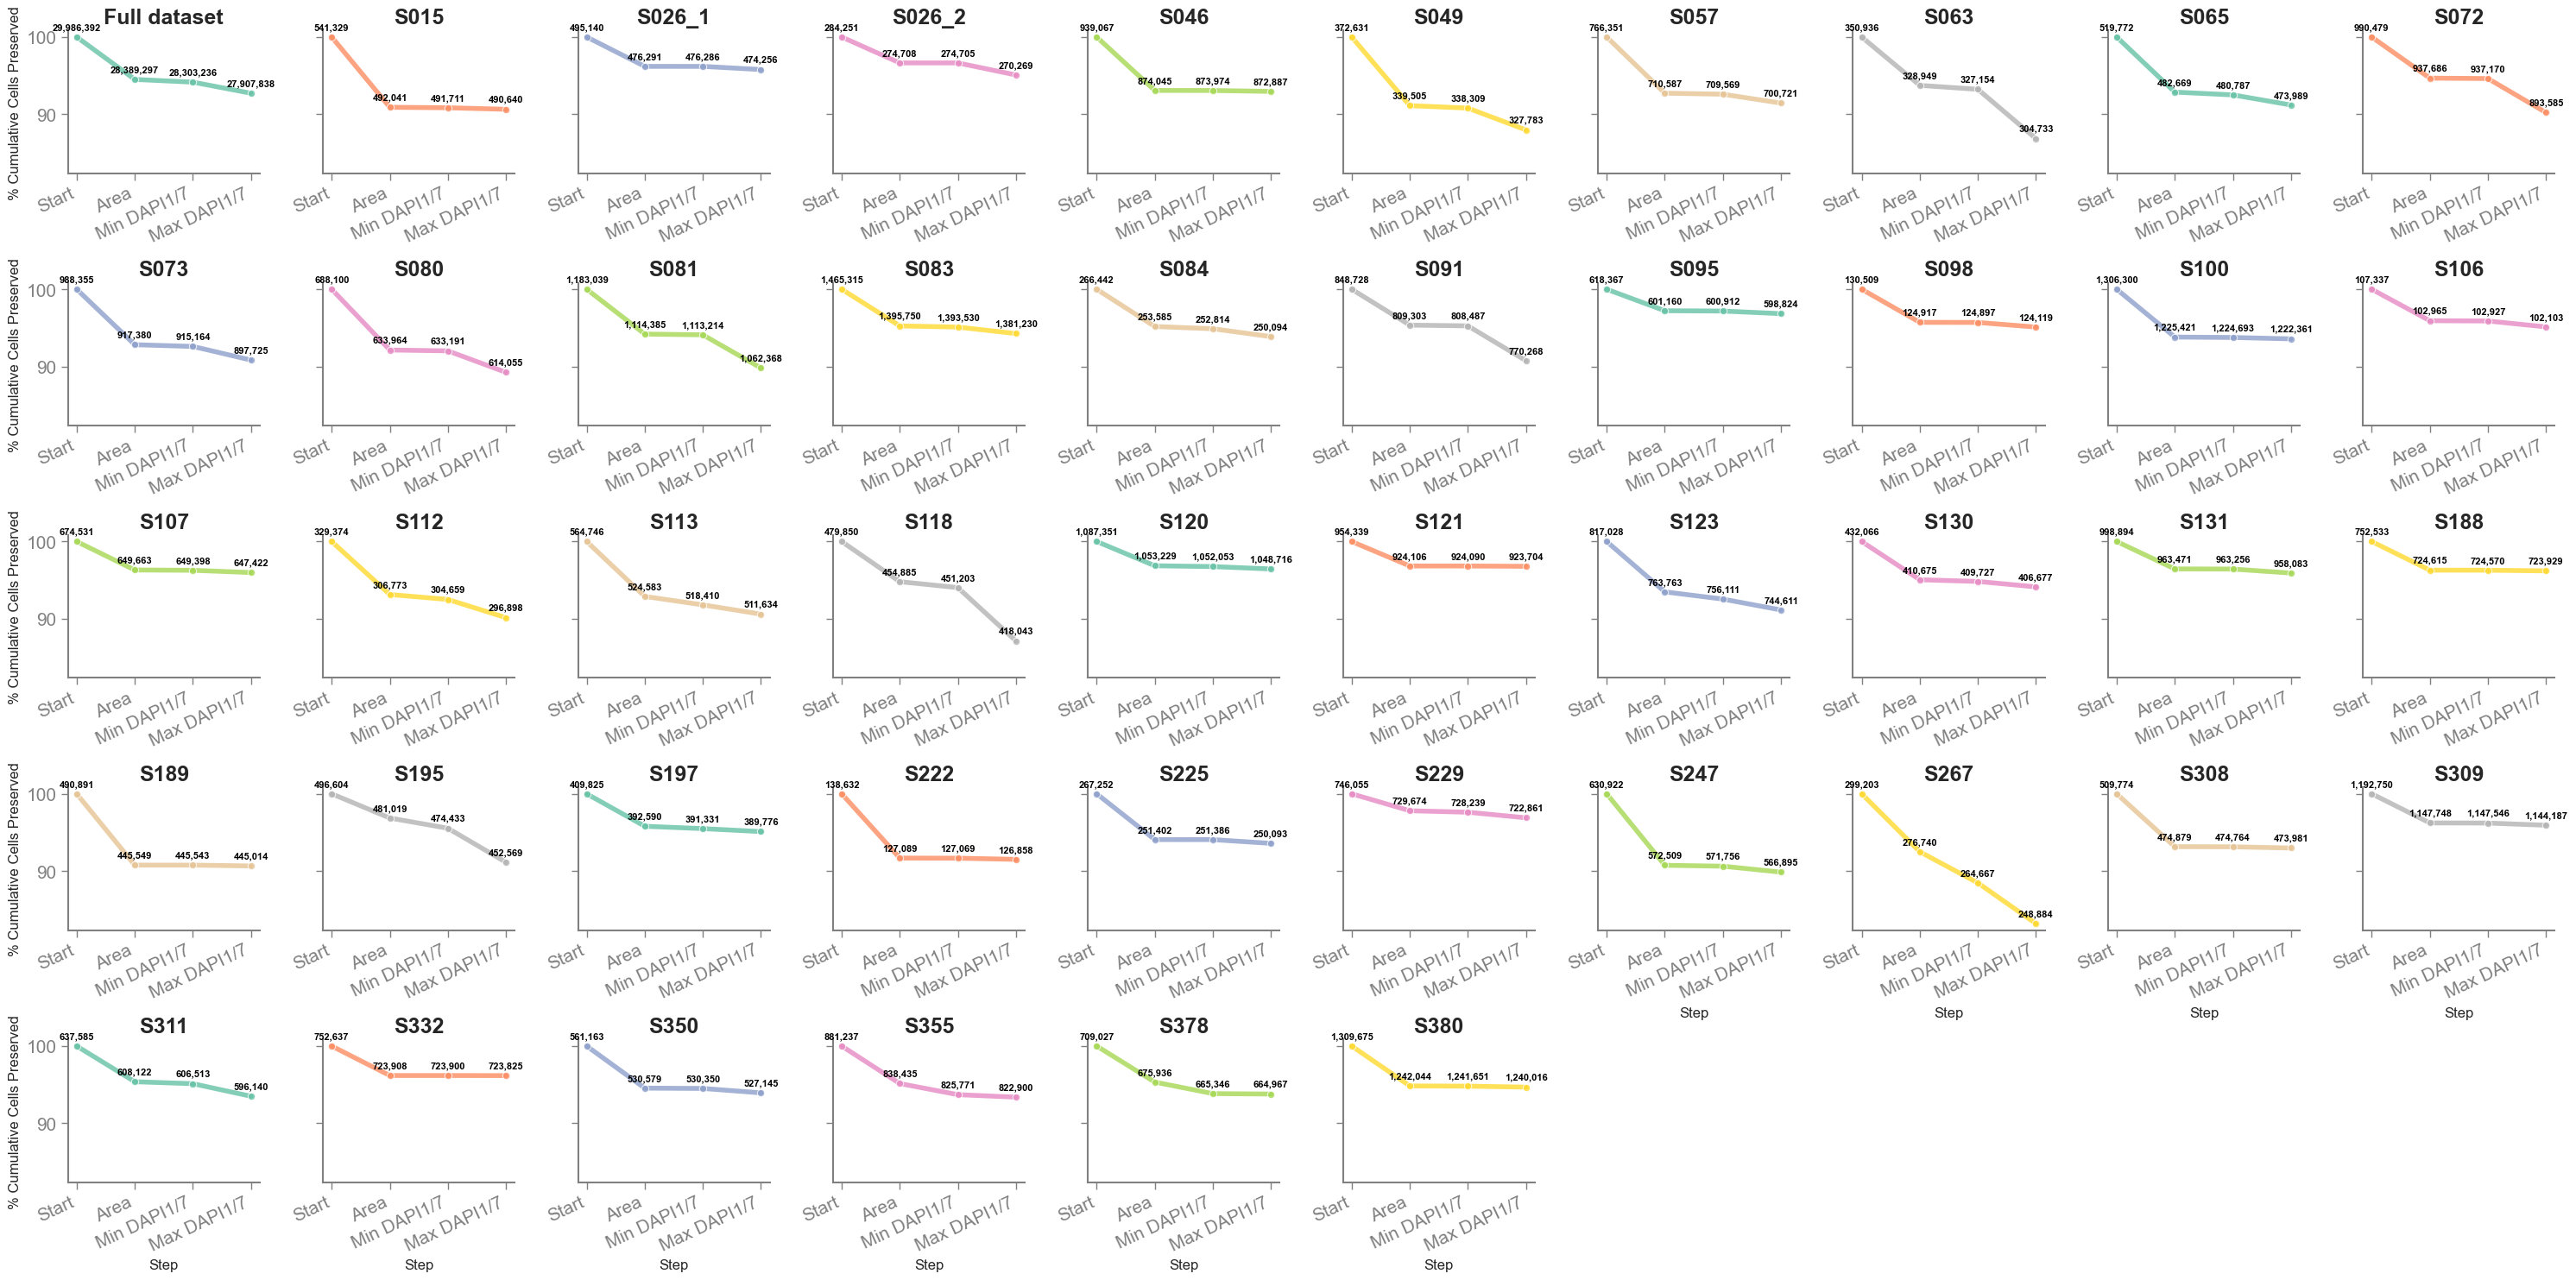

In [34]:
# PLOT QC RESULTS
sns.set(style="ticks", rc={
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1.5,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.color': 'gray',
    'ytick.color': 'gray',
    'font.size': 7,
})
sns.set_context("notebook")

# Custom function with annotations using the assigned color
def lineplot_with_annotations(data, color=None, **kwargs):
    sns.lineplot(
        data=data,
        x="step",
        y="percentage_cumulative_cells_preserved",
        marker="o",
        linewidth=4,
        markersize=6,
        alpha=0.8,
        color=color,
        **kwargs
    )
    for _, row in data.iterrows():
        plt.text(
            row["step"],
            row["percentage_cumulative_cells_preserved"] + 1,
            f'{int(row["cumulative_cells_preserved"]):,}',
            ha='center',
            fontsize= 8,
            fontweight='bold',
            color='black'
        )

# Step 1: Create "Full dataset" summary
summary = (
    sample_qc.groupby('step')
    .agg({
        'percentage_cumulative_cells_preserved': 'mean',
        'cumulative_cells_preserved': 'sum'
    })
    .reset_index()
)
summary['sample'] = 'Full dataset'

# Step 2: Combine with original data and include "Start" step
sample_qc_with_total = pd.concat([sample_qc, summary], ignore_index=True)
sample_order = ['Full dataset'] + sorted(sample_qc['sample'].unique().tolist())
sample_qc_with_total['sample'] = pd.Categorical(sample_qc_with_total['sample'], categories=sample_order, ordered=True)

# Ensure 'Start' step is always the first one for each sample
# Reorder so that 'Start' comes before other steps for each sample
step_order = ['Start'] + [t.get('title', f"{t['column']}_{t['cutoff_type']}") for t in thresholds]

# Apply the step order to the 'step' column
sample_qc_with_total['step'] = pd.Categorical(
    sample_qc_with_total['step'],
    categories=step_order,
    ordered=True
)

# Step 3: FacetGrid with color
g = sns.FacetGrid(
    sample_qc_with_total,
    col="sample",
    col_wrap=10,
    height=3,
    sharey=True,
    sharex= False,
    hue="sample",
    palette="Set2"
)

g.map_dataframe(lineplot_with_annotations)

# Improve titles and axes
g.set_titles(col_template="{col_name}", size=18, fontweight='bold')
g.set_axis_labels("Step", "% Cumulative Cells Preserved")

# Style all axes
for ax in g.axes.flatten():
    ax.tick_params(axis='both', labelsize=15, width=1)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.setp(ax.get_xticklabels(), rotation=25, ha='right')

plt.tight_layout()
# Save the figure BEFORE showing it
g.figure.savefig(
    'G://farkkilab2//7_TLS//Data//Exp_4//qc//results//qc_summary_figure.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()


## Apply thresholds and save results

In [35]:
def apply_threshold_filters(df, thresholds):
    """
    Apply sequential threshold filters to a DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        thresholds (list of dict): List of threshold rules. Each rule must include:
            - 'column': column name to filter
            - 'cutoff_type': 'lower' or 'upper'
            - 'value': numeric threshold
            - 'title': optional, ignored in filtering

    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    filtered_df = df.copy()

    for rule in thresholds:
        column = rule['column']
        cutoff_type = rule['cutoff_type']
        value = rule['value']

        if cutoff_type == 'lower':
            filtered_df = filtered_df[filtered_df[column] >= value]
        elif cutoff_type == 'upper':
            filtered_df = filtered_df[filtered_df[column] <= value]
        else:
            raise ValueError(f"Invalid cutoff type '{cutoff_type}' in rule for column '{column}'")

    return filtered_df



In [36]:
# Apply the threshold and save the results
qc_result_df = apply_threshold_filters(result_df, thresholds)
qc_result_df = qc_result_df.drop("ratio_unsc",axis=1)

marker_list =    ['aSMA_filt_norm', 'BCL6_filt_norm', 'CD11c_filt_norm',
       'CD138_filt_norm', 'CD20_filt_norm', 'CD21_filt_norm',
       'CD31_filt_norm', 'CD3D_filt_norm', 'CD4_filt_norm',
       'CD8a_filt_norm', 'FOXP3_filt_norm', 'HEV_filt_norm',
       'HLA-A_filt_norm', 'HLA-DPB2_filt_norm', 'Iba1_filt_norm',
       'IgD_filt_norm', 'IgG_filt_norm', 'Ki67_filt_norm',
       'NKGA_filt_norm', 'PD1_filt_norm', 'Tcf1_filt_norm',
       'Vimentin_filt_norm', 'DAPI1_normalized', 'BCL6_normalized',
       'IgG_normalized', 'AICDA_normalized', 'CD138_normalized',
       'DAPI2_normalized', 'Tcf1_normalized', 'FOXP3_normalized',
       'PD1_normalized', 'CD45_normalized', 'DAPI3_normalized',
       'CD21_normalized', 'Ki-67_normalized', 'CD20_normalized',
       'Vimentin_normalized', 'DAPI4_normalized', 'CD4_normalized',
       'CD11c_normalized', 'CD8a_normalized', 'DAPI5_normalized',
       'HEV_normalized', 'PanCK_normalized', 'CD31_normalized',
       'DAPI6_normalized', 'Iba1_normalized', 'CD3D_normalized',
       'IgD_normalized', 'DAPI7_normalized', 'aSMA_normalized',
       'HLA-DPB2_normalized', 'HLA-A_normalized', 'DAPI1', 'BCL6', 'IgG',
       'AICDA', 'CD138', 'DAPI2', 'Tcf1', 'FOXP3', 'PD1', 'CD45', 'DAPI3',
       'CD21', 'Ki-67', 'CD20', 'Vimentin', 'DAPI4', 'CD4', 'CD11c',
       'CD8a', 'DAPI5', 'HEV', 'PanCK', 'CD31', 'DAPI6', 'Iba1', 'CD3D',
       'IgD', 'DAPI7', 'aSMA', 'HLA-DPB2', 'HLA-A', 'DAPI8', 'CD68',
       'PAX8', 'NKG2A', 'DAPI9', 'CD163', 'FAP', 'PAX8_2']
data = qc_result_df[marker_list]
meta = qc_result_df.drop(columns=marker_list)
adata = ad.AnnData (data)
adata.obs = meta


In [38]:
adata.var_names

Index(['aSMA_filt_norm', 'BCL6_filt_norm', 'CD11c_filt_norm',
       'CD138_filt_norm', 'CD20_filt_norm', 'CD21_filt_norm', 'CD31_filt_norm',
       'CD3D_filt_norm', 'CD4_filt_norm', 'CD8a_filt_norm', 'FOXP3_filt_norm',
       'HEV_filt_norm', 'HLA-A_filt_norm', 'HLA-DPB2_filt_norm',
       'Iba1_filt_norm', 'IgD_filt_norm', 'IgG_filt_norm', 'Ki67_filt_norm',
       'NKGA_filt_norm', 'PD1_filt_norm', 'Tcf1_filt_norm',
       'Vimentin_filt_norm', 'DAPI1_normalized', 'BCL6_normalized',
       'IgG_normalized', 'AICDA_normalized', 'CD138_normalized',
       'DAPI2_normalized', 'Tcf1_normalized', 'FOXP3_normalized',
       'PD1_normalized', 'CD45_normalized', 'DAPI3_normalized',
       'CD21_normalized', 'Ki-67_normalized', 'CD20_normalized',
       'Vimentin_normalized', 'DAPI4_normalized', 'CD4_normalized',
       'CD11c_normalized', 'CD8a_normalized', 'DAPI5_normalized',
       'HEV_normalized', 'PanCK_normalized', 'CD31_normalized',
       'DAPI6_normalized', 'Iba1_normalized', 'CD3D

In [39]:
adata.write("G://farkkilab2//7_TLS//Data//Exp_4//qc//results//qc2_all_06_08.h5ad")